In [2]:
# -----------------------------------------------------------
# PRODUCT RELATIONSHIP ANALYSIS - FULL DATA ANALYSIS PIPELINE
# -----------------------------------------------------------

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from mlxtend.frequent_patterns import apriori, association_rules

# -------------------------
# 2. LOAD THE DATA
# -------------------------
file_path = "BlinkIT Grocery Data.xlsx"   # update path if needed
df = pd.read_excel(file_path)

print("Shape:", df.shape)
df.head()

Shape: (8523, 12)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
# Check column datatypes
print(df.dtypes)

# Check missing values
df.isnull().sum()

# Remove duplicates
df = df.drop_duplicates()

# Fill missing values (example strategy)
df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].median())
df['Outlet Size'] = df['Outlet Size'].fillna("Unknown")

# Clean text columns (strip whitespace)
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

df.head()

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [14]:
# Standard cleaning
df = df.drop_duplicates()

df['Item Weight'] = df['Item Weight'].fillna(df['Item Weight'].median())
df['Outlet Size'] = df['Outlet Size'].fillna("Unknown")

# Normalize fat content inconsistencies
df['Item Fat Content'] = df['Item Fat Content'].replace({
    'low fat': 'Low Fat',
    'LF': 'Low Fat',
    'reg': 'Regular'
})

In [5]:
#EDA
df.describe(include='all')

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
count,8523,8523,8523,8523.000000,8523,8523,8523,8523,8523.000000,8523.00000,8523.000000,8523.000000
unique,5,1559,16,NaN,10,3,3,4,NaN,NaN,NaN,NaN
top,Low Fat,FDW13,Fruits and Vegetables,NaN,OUT027,Tier 3,Medium,Supermarket Type1,NaN,NaN,NaN,NaN
freq,5089,10,1232,NaN,935,3350,3631,5577,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2016.450546,NaN,NaN,NaN,NaN,0.066132,12.81342,140.992783,3.965857
std,NaN,NaN,NaN,3.189396,NaN,NaN,NaN,NaN,0.051598,4.22724,62.275067,0.605651
min,NaN,NaN,NaN,2011.000000,NaN,NaN,NaN,NaN,0.000000,4.55500,31.290000,1.000000
25%,NaN,NaN,NaN,2014.000000,NaN,NaN,NaN,NaN,0.026989,9.31000,93.826500,4.000000
50%,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN,0.053931,12.60000,143.012800,4.000000
75%,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,0.094585,16.00000,185.643700,4.200000


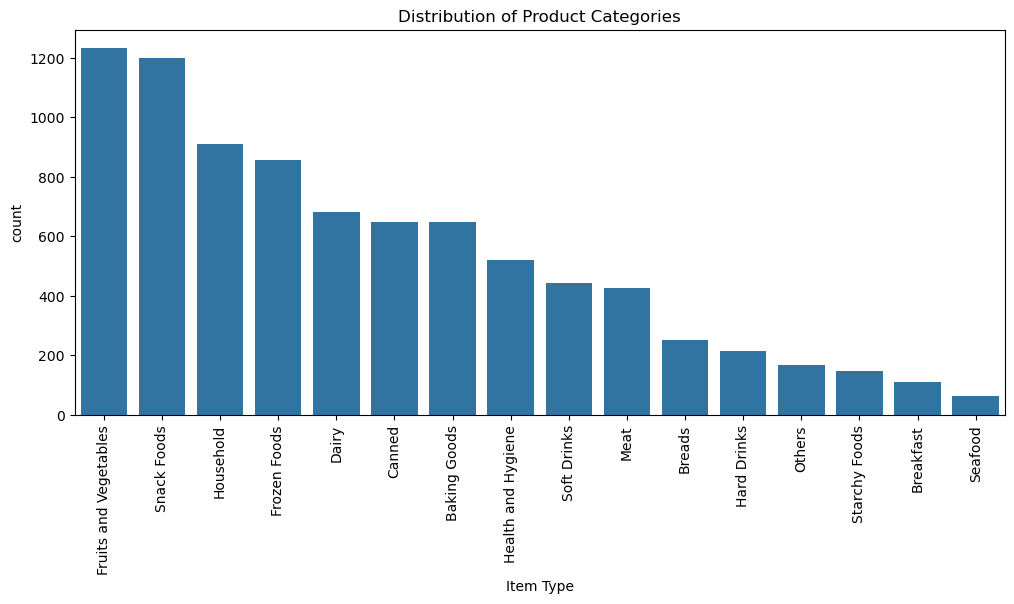

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='Item Type', order=df['Item Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Distribution of Product Categories")
plt.show()

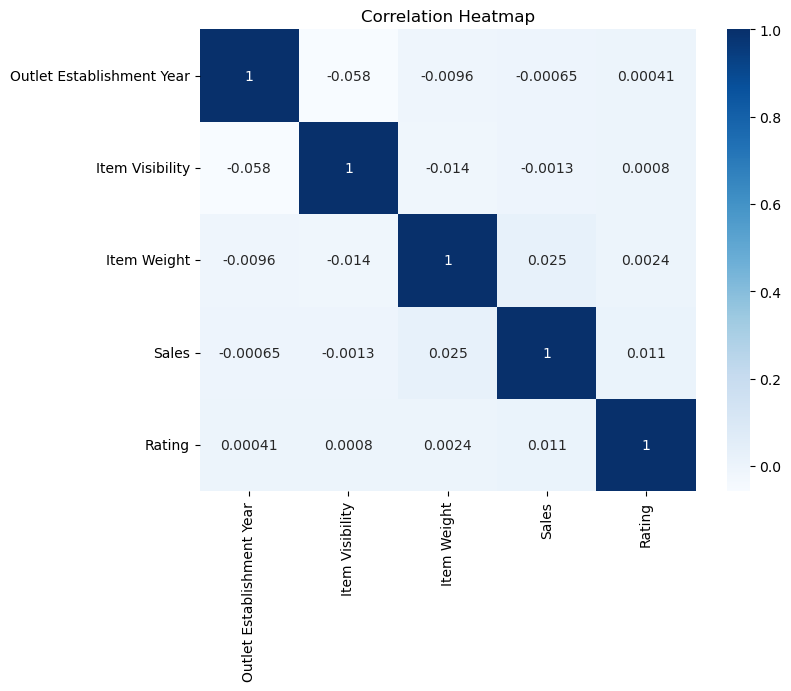

In [18]:
plt.figure(figsize=(8,6))

numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap="Blues")

plt.title("Correlation Heatmap")
plt.show()

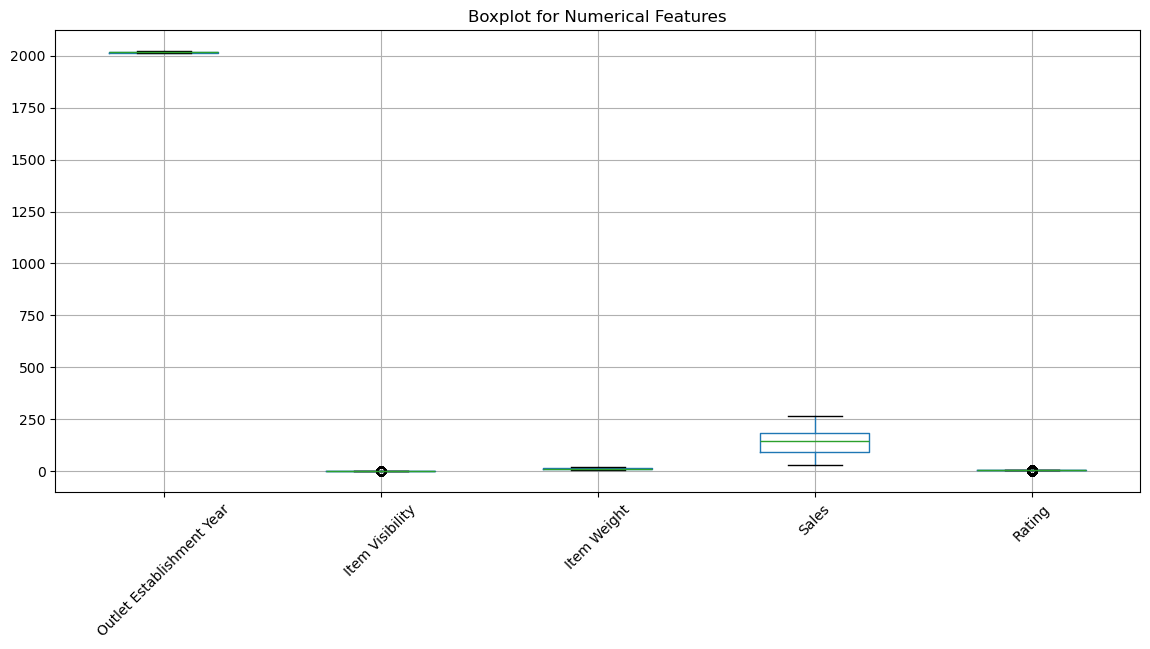

Item Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [7]:
# Look for outliers in numerical columns
num_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(14, 6))
df[num_cols].boxplot()
plt.title("Boxplot for Numerical Features")
plt.xticks(rotation=45)
plt.show()

# Value counts for product categories
df['Item Fat Content'].value_counts()
df['Item Type'].value_counts()

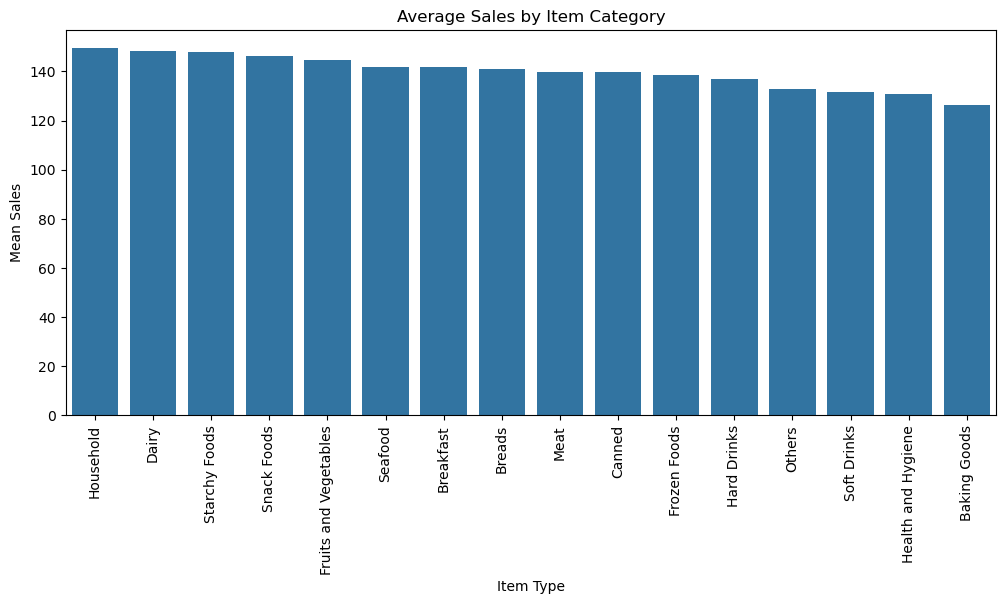

In [20]:
#Relationship Between Product Features & Sales
sales_by_type = df.groupby("Item Type")["Sales"].mean().sort_values(ascending=False)

plt.figure(figsize=(12,5))
sns.barplot(x=sales_by_type.index, y=sales_by_type.values)
plt.xticks(rotation=90)
plt.title("Average Sales by Item Category")
plt.ylabel("Mean Sales")
plt.show()

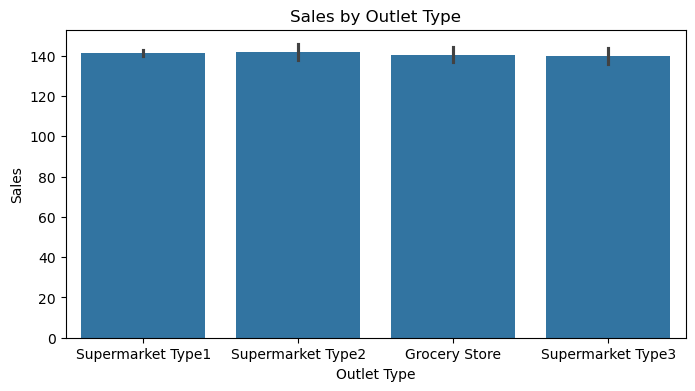

In [22]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Outlet Type', y='Sales')
plt.title("Sales by Outlet Type")
plt.show()

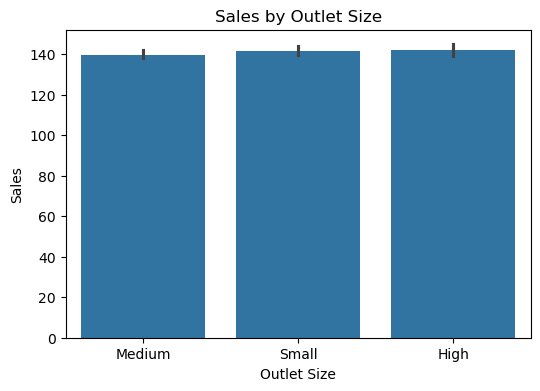

In [24]:
plt.figure(figsize=(6,4))
sns.barplot(data=df, x='Outlet Size', y='Sales')
plt.title("Sales by Outlet Size")
plt.show()

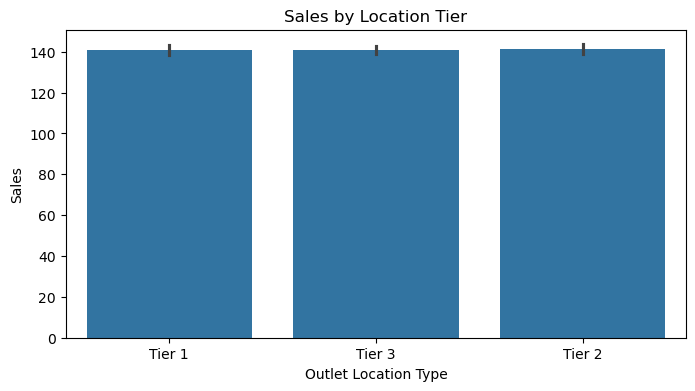

In [26]:
plt.figure(figsize=(8,4))
sns.barplot(data=df, x='Outlet Location Type', y='Sales')
plt.title("Sales by Location Tier")
plt.show()

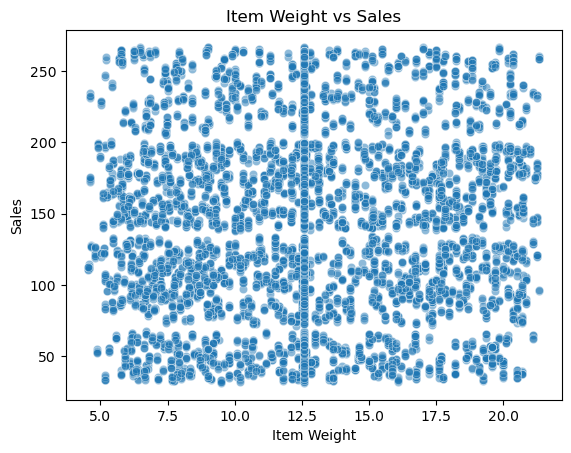

In [28]:
sns.scatterplot(data=df, x="Item Weight", y="Sales", alpha=0.5)
plt.title("Item Weight vs Sales")
plt.show()

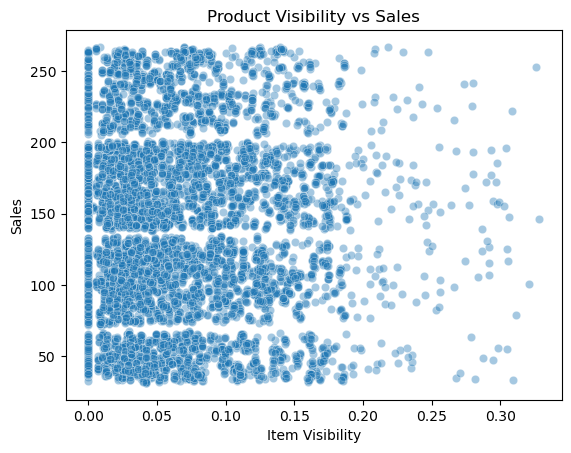

In [30]:
sns.scatterplot(data=df, x="Item Visibility", y="Sales", alpha=0.4)
plt.title("Product Visibility vs Sales")
plt.show()

In [31]:
#Derived Product Relationship Insights
relationship_summary = pd.DataFrame({
    'Feature': ['Item Type', 'Item Fat Content', 'Outlet Type', 'Outlet Size', 'Outlet Location Type'],
    'Effect on Sales': [
        df.groupby("Item Type")["Sales"].mean().idxmax(),
        df.groupby("Item Fat Content")["Sales"].mean().idxmax(),
        df.groupby("Outlet Type")["Sales"].mean().idxmax(),
        df.groupby("Outlet Size")["Sales"].mean().idxmax(),
        df.groupby("Outlet Location Type")["Sales"].mean().idxmax()
    ]
})

relationship_summary


,Feature,Effect on Sales
0,Item Type,Household
1,Item Fat Content,Regular
2,Outlet Type,Supermarket Type2
3,Outlet Size,High
4,Outlet Location Type,Tier 2


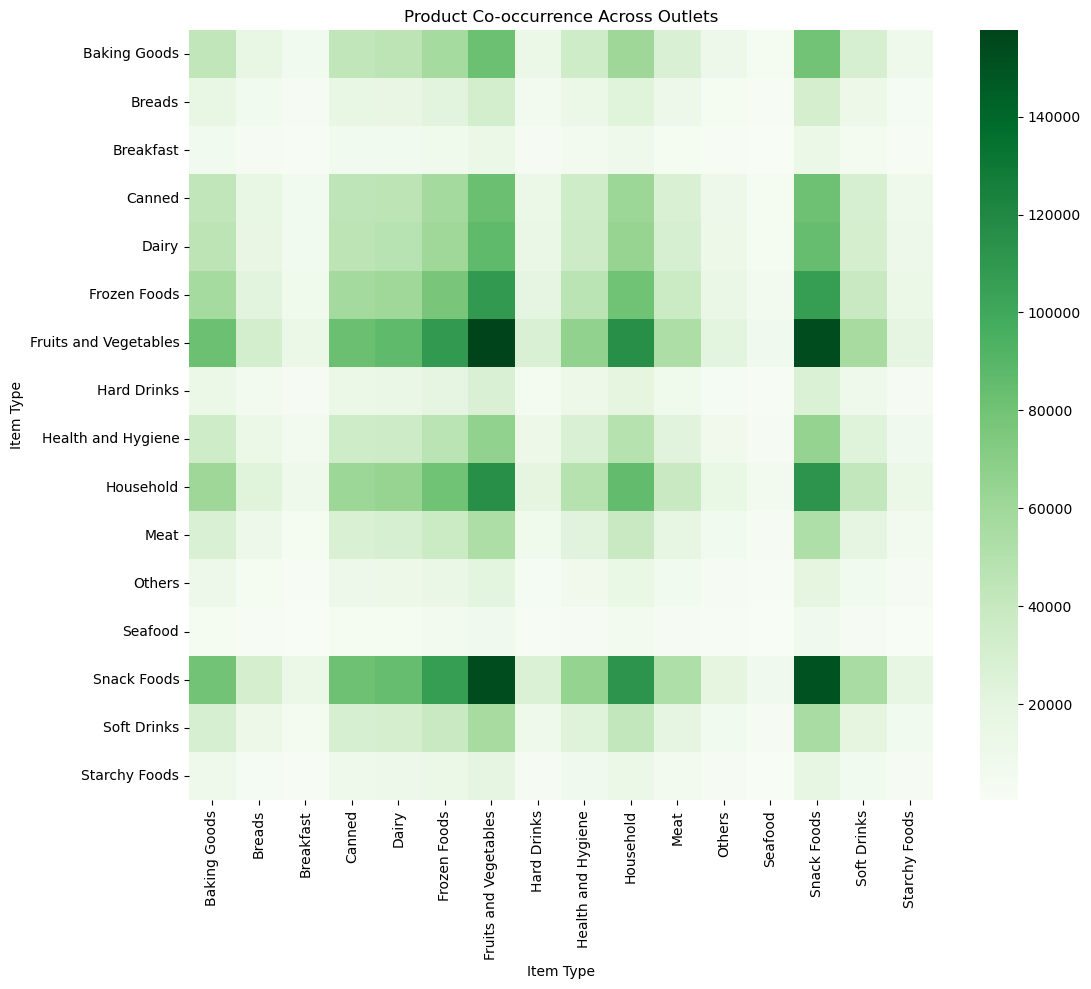

In [32]:
# Creating outlet baskets
# Create pivot of Outlet vs Item Types
outlet_basket = df.groupby(['Outlet Identifier', 'Item Type'])['Item Type'] \
                  .count().unstack().fillna(0)

# Co-occurrence across outlets
co_occurrence = outlet_basket.T.dot(outlet_basket)

plt.figure(figsize=(12,10))
sns.heatmap(co_occurrence, cmap="Greens")
plt.title("Product Co-occurrence Across Outlets")
plt.show()